In [1]:
import matplotlib.pyplot as plt
import numpy as np

import optical_gating_analysis as OG
from tqdm import tqdm

In [90]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pgf import FigureCanvasPgf

matplotlib.backend_bases.register_backend("pgf", FigureCanvasPgf)
matplotlib.rcParams.update(
    {
        # Adjust to your LaTex-Engine
        "pgf.texsystem": "xelatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "axes.unicode_minus": False,
    }
)

matplotlib.rcParams['figure.figsize'] = (4.01407, 3.09654)

In [27]:
oog = OG.BasicOpticalGating()
oog.sequence_manager.set_source(r"E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.30.44 vid bloodless 200fps\Allied Vision Technologies GS650 0001f61c\*tif")
oog.sequence_manager.set_reference_sequence(r"E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.30.44 vid bloodless 200fps\ref-frames-2024-04-26-17.29.51\*tif")
oog.sequence_manager.reference_period = 73.106274
#oog.settings["include_reference_frames"] = False
oog.run()

Setting source to E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.30.44 vid bloodless 200fps\Allied Vision Technologies GS650 0001f61c\*tif
Loading reference sequence from E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.30.44 vid bloodless 200fps\ref-frames-2024-04-26-17.29.51\*tif


Getting phases: 100%|██████████| 37970/37970 [00:00<00:00, 135458.83it/s]


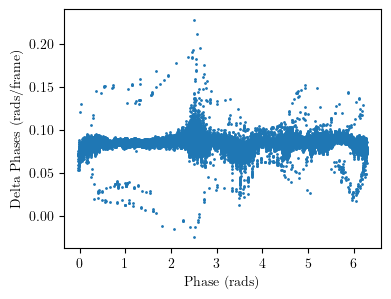

In [96]:
plt.figure()
plt.scatter(oog.phases[1::], oog.delta_phases, s = 1, rasterized = True)
plt.xlabel("Phase (rads)")
plt.ylabel("Delta Phases (rads/frame)")
plt.tight_layout()
plt.savefig("delta_phase_vs_phase_lower_noise.pgf")
plt.show()

In [28]:
ref_diffs = np.sum(np.abs(np.diff(oog.sequence_manager.reference_sequence.astype(np.int32), axis = 0)), axis=(1, 2))

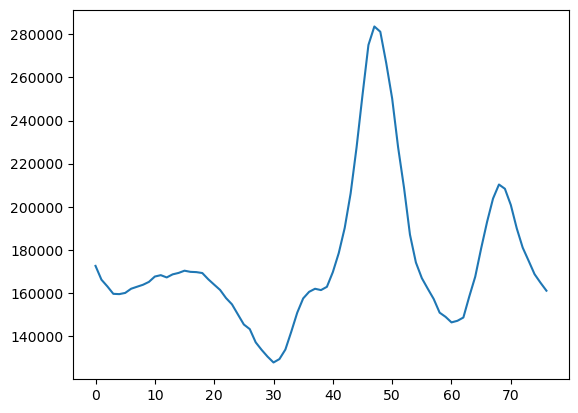

In [29]:
plt.plot(ref_diffs)

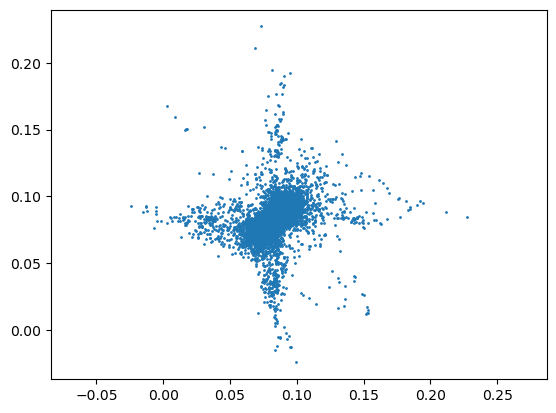

In [32]:
plt.scatter(oog.delta_phases[1::], oog.delta_phases[0:-1], s = 1)
plt.axis("equal")
plt.show()

(array([13548, 13550, 13932, 13942, 14141, 14308, 17424, 17438, 19749,
       22804, 22869, 23175, 23623, 24730, 25857, 26228, 26603, 27264,
       27639, 28425, 34107, 35374, 35536, 35671, 35763, 35988, 36138,
       36213, 36347, 36587, 37036, 37333, 37556, 37707], dtype=int64),)


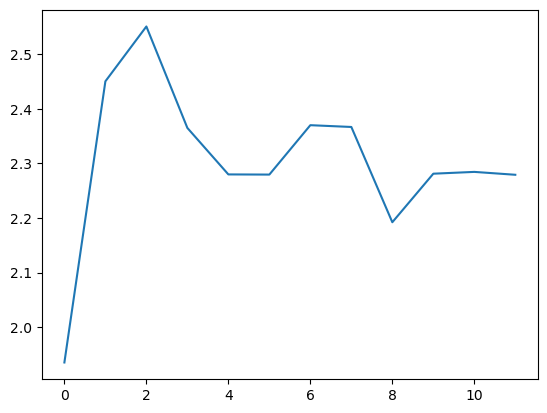

In [82]:
print(np.where(oog.delta_phases > 0.15))
plt.plot(oog.phases[np.where(oog.delta_phases > 0.17)])

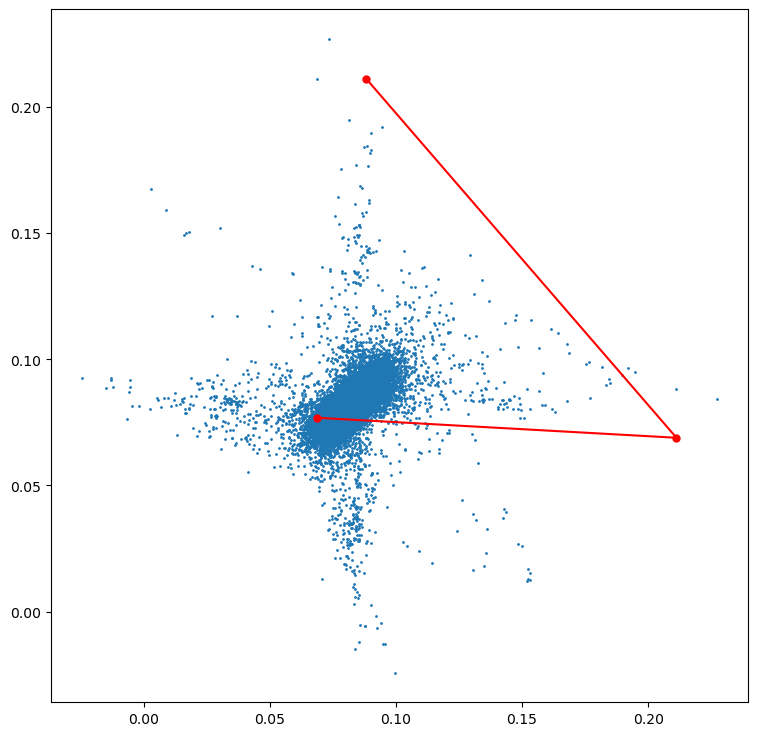

In [87]:
plt.figure(figsize = (9,9))
plt.scatter(oog.delta_phases[1::], oog.delta_phases[0:-1], s = 1)
startat = 25856
length = 3
plt.plot(oog.delta_phases[startat:startat + length], oog.delta_phases[startat + 1:startat + length + 1], "o-", markersize = 5, c = "red")
plt.axis("equal")
plt.show()

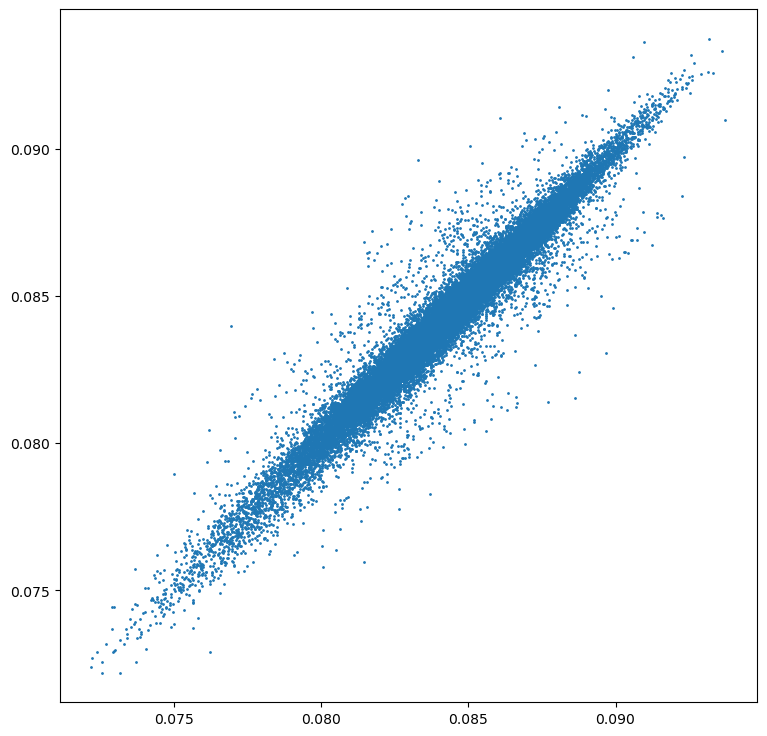

In [78]:
# Moving average using a convolution
window_size = 20
window = np.ones(window_size)/window_size
smoothed = np.convolve(oog.delta_phases, window, mode = "valid")

# Plot Poincaré
plt.figure(figsize = (9,9))
#plt.scatter(oog.delta_phases[1::], oog.delta_phases[0:-1], s = 1)
plt.scatter(smoothed[1::], smoothed[0:-1], s = 1)
plt.axis("equal")
plt.show()
